### Combination immune + cancer automata

#### 1.- Low malignancy, normal immune system

In [1]:
from TumorModel import CellType
from TumorModel import Cell
from TumorModel import Tissue
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython import display
from mpl_toolkits.mplot3d import Axes3D  
from matplotlib import cm

In [2]:
#Create a new tissue
automatonWidth = 100
automatonHeight = 100

tissue1 = Tissue(automatonWidth, automatonHeight)

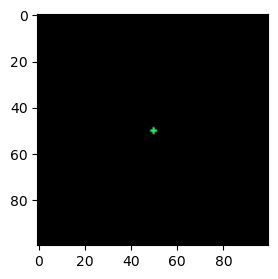

In [3]:
#Add some cells in the center
centerX = int(automatonWidth/2)
centerY = int(automatonHeight/2)

tissue1.addProliferatingCell(centerX, centerY)
tissue1.addProliferatingCell(centerX + 1, centerY)
tissue1.addProliferatingCell(centerX -1, centerY)
tissue1.addProliferatingCell(centerX, centerY + 1)
tissue1.addProliferatingCell(centerX, centerY - 1)

fig, ax = plt.subplots(figsize = (3,3))


ax.imshow(tissue1.getPicture(True))

In [4]:
#Let's evolve the system
nSteps = 300
tissue1.evolve(nSteps, False, True, False)

100%|█████████████████████████████████████████| 300/300 [01:44<00:00,  2.88it/s]


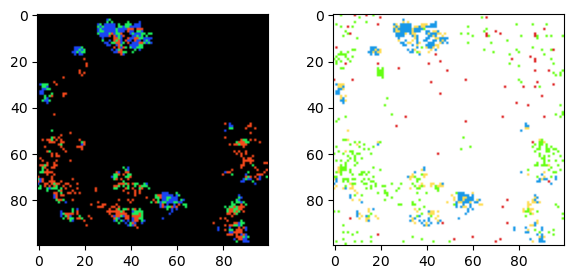

In [5]:
#Visualize the state of the tumor
fig, ax = plt.subplots(1, 2, figsize = (7,3))
ax[0].imshow(tissue1.getPicture(True))
ax[1].imshow(tissue1.immuneSystem.getPicture())

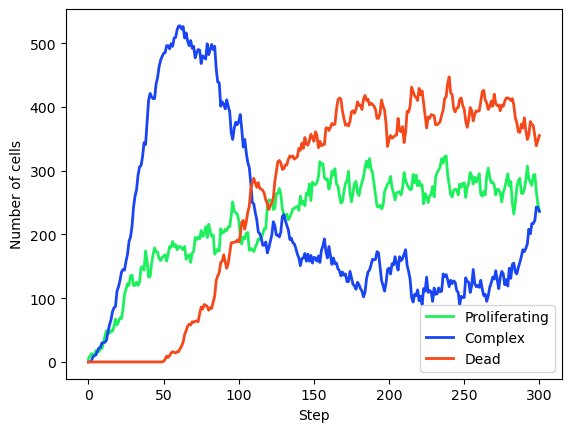

In [6]:
fig, ax = plt.subplots()
#ax.plot(tissue1.cellCountSeries[:,0])
#ax.set_xlabel("Step")
#ax.set_ylabel("N. proliferating cells")
tissue1.plotEvolution(ax)

In [ ]:
movie = tissue1.immuneMovie
fig, ax = plt.subplots()

def immuneFrame(i):
    ax.clear()
    ax.imshow(movie[:,:,:,i])

def animateImmuneSystem(movie):
    duration = 30
    nFrames = np.size(movie,3)
    deltaT = (duration/nFrames)*1000
    anim = animation.FuncAnimation(fig, immuneFrame, frames = nFrames, interval = deltaT, blit = False)
    video = anim.to_html5_video()
    html = display.HTML(video)
    display.display(html)
    plt.close()

animateImmuneSystem(movie)

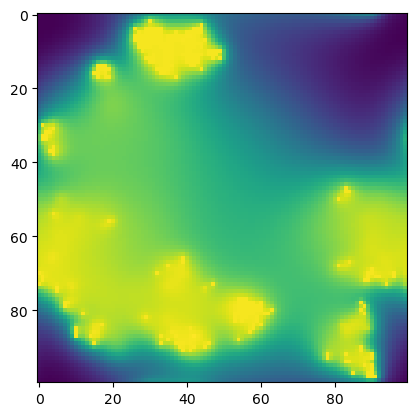

In [7]:
plt.imshow(tissue1.immuneSystem.cytokineConcentration)

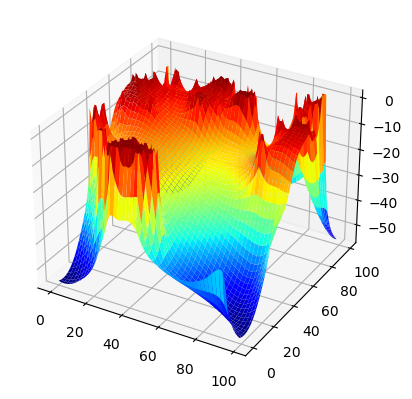

In [8]:
x = y = np.arange(0, 100, 1)
X, Y = np.meshgrid(x, y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,tissue1.immuneSystem.cytokineConcentration, cmap=cm.jet)

### 2.- Autoimmune, low malignancy 

In [9]:
automatonWidth = 100
automatonHeight = 100

tissue2= Tissue(automatonWidth, automatonHeight)
tissue2.immuneSystem.activateImmuneDisease()

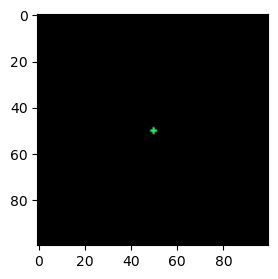

In [10]:
#Add some cells in the center
centerX = int(automatonWidth/2)
centerY = int(automatonHeight/2)

tissue2.addProliferatingCell(centerX, centerY)
tissue2.addProliferatingCell(centerX + 1, centerY)
tissue2.addProliferatingCell(centerX -1, centerY)
tissue2.addProliferatingCell(centerX, centerY + 1)
tissue2.addProliferatingCell(centerX, centerY - 1)

fig, ax = plt.subplots(figsize = (3,3))

ax.imshow(tissue2.getPicture(True))

In [11]:
#Let's evolve the system 
nSteps = 300
tissue2.evolve(nSteps, False, True, False)

100%|█████████████████████████████████████████| 300/300 [02:27<00:00,  2.03it/s]


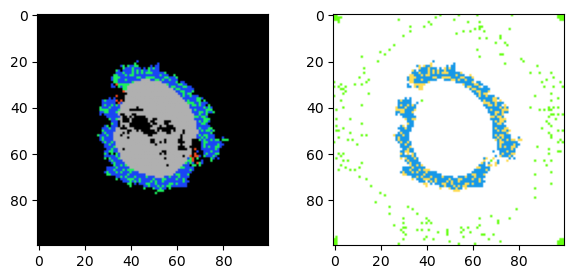

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (7,3))
ax[0].imshow(tissue2.getPicture(True))
ax[1].imshow(tissue2.immuneSystem.getPicture())

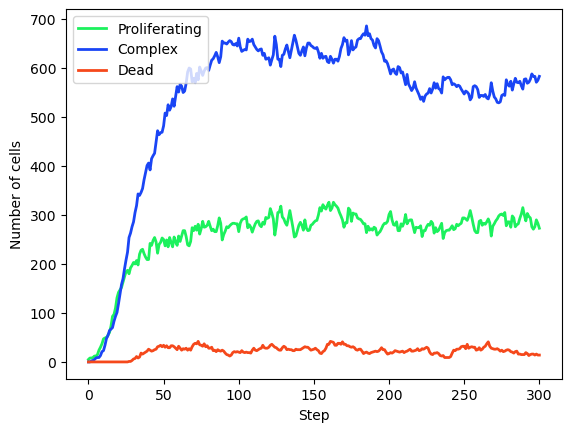

In [13]:
fig, ax = plt.subplots()
tissue2.plotEvolution(ax)

-13.872164249634917

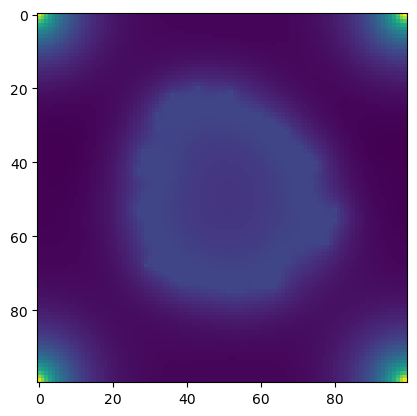

In [14]:
plt.imshow(tissue2.immuneSystem.cytokineConcentration)
tissue2.immuneSystem.cytokineConcentration[10,10]

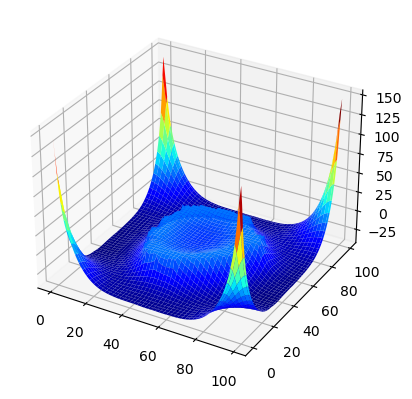

In [15]:
x = y = np.arange(0, 100, 1)
X, Y = np.meshgrid(x, y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,tissue2.immuneSystem.cytokineConcentration, cmap=cm.jet)

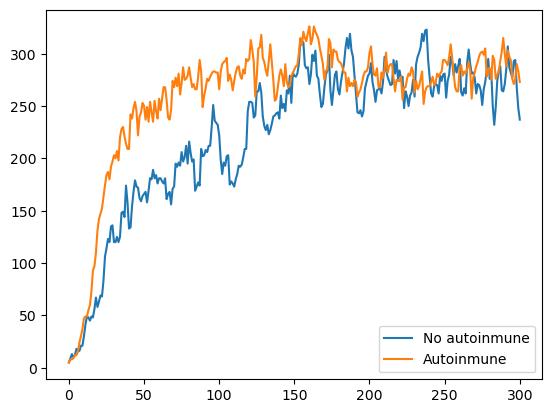

In [16]:
plt.figure()
plt.plot(tissue1.cellCountSeries[:,0], label = "No autoinmune")
plt.plot(tissue2.cellCountSeries[:,0], label = "Autoinmune")
plt.legend()

### 3.- Normal immunity + high malignancy

In [17]:
#Create a new tissue
automatonWidth = 100
automatonHeight = 100

tissue3 = Tissue(automatonWidth, automatonHeight)

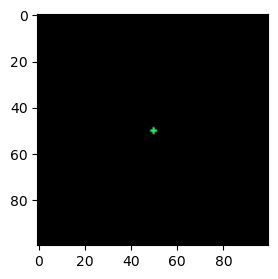

In [18]:
#Add some cells in the center
centerX = int(automatonWidth/2)
centerY = int(automatonHeight/2)

tissue3.addProliferatingCell(centerX, centerY)
tissue3.addProliferatingCell(centerX + 1, centerY)
tissue3.addProliferatingCell(centerX -1, centerY)
tissue3.addProliferatingCell(centerX, centerY + 1)
tissue3.addProliferatingCell(centerX, centerY - 1)

fig, ax = plt.subplots(figsize = (3,3))


ax.imshow(tissue3.getPicture(True))

In [19]:
tissue3.makeTumorMalignant()
nSteps = 300
tissue3.evolve(nSteps, False, True, False)


100%|█████████████████████████████████████████| 300/300 [01:52<00:00,  2.67it/s]


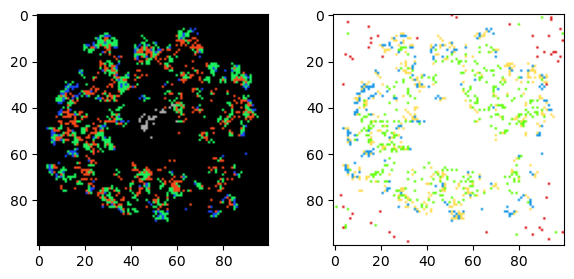

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (7,3))
ax[0].imshow(tissue3.getPicture(True))
ax[1].imshow(tissue3.immuneSystem.getPicture())

In [ ]:
movie = tissue3.immuneMovie
fig, ax = plt.subplots()

def immuneFrame(i):
    ax.clear()
    ax.imshow(movie[:,:,:,i])

def animateImmuneSystem(movie):
    duration = 30
    nFrames = np.size(movie,3)
    deltaT = (duration/nFrames)*1000
    anim = animation.FuncAnimation(fig, immuneFrame, frames = nFrames, interval = deltaT, blit = False)
    video = anim.to_html5_video()
    html = display.HTML(video)
    display.display(html)
    plt.close()

animateImmuneSystem(movie)

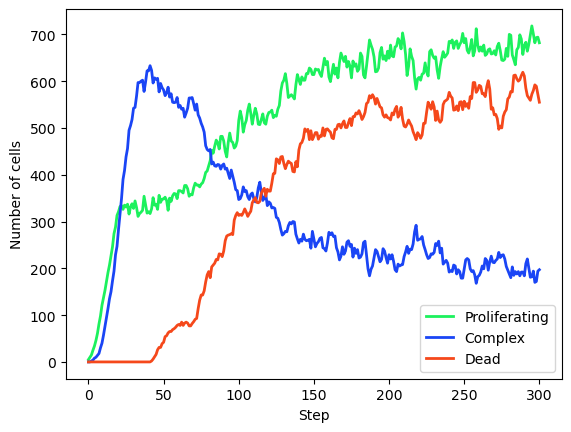

In [21]:
fig, ax = plt.subplots()
tissue3.plotEvolution(ax)

### 4.- Autoimmune disease + high malignancy

In [22]:
#Create a new tissue
automatonWidth = 100
automatonHeight = 100

tissue4 = Tissue(automatonWidth, automatonHeight)
tissue4.immuneSystem.activateImmuneDisease()

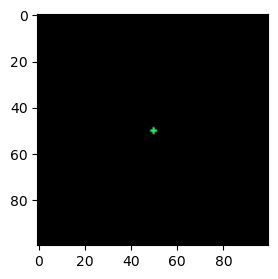

In [23]:
#Add some cells in the center
centerX = int(automatonWidth/2)
centerY = int(automatonHeight/2)

tissue4.addProliferatingCell(centerX, centerY)
tissue4.addProliferatingCell(centerX + 1, centerY)
tissue4.addProliferatingCell(centerX -1, centerY)
tissue4.addProliferatingCell(centerX, centerY + 1)
tissue4.addProliferatingCell(centerX, centerY - 1)

fig, ax = plt.subplots(figsize = (3,3))


ax.imshow(tissue4.getPicture(True))

In [24]:
tissue4.makeTumorMalignant()
nSteps = 300
tissue4.evolve(nSteps, False, False, False)

100%|█████████████████████████████████████████| 300/300 [02:10<00:00,  2.30it/s]


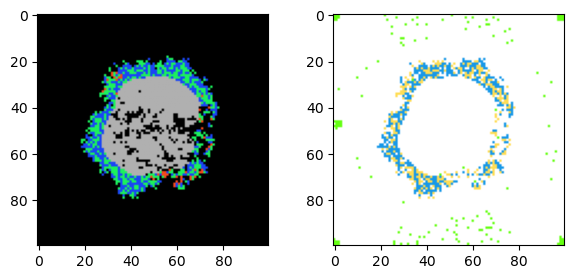

In [25]:
fig, ax = plt.subplots(1, 2, figsize = (7,3))
ax[0].imshow(tissue4.getPicture(True))
ax[1].imshow(tissue4.immuneSystem.getPicture())

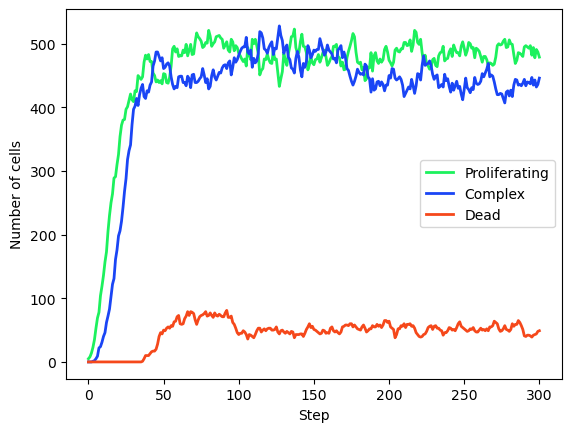

In [26]:
fig, ax = plt.subplots()
tissue4.plotEvolution(ax)

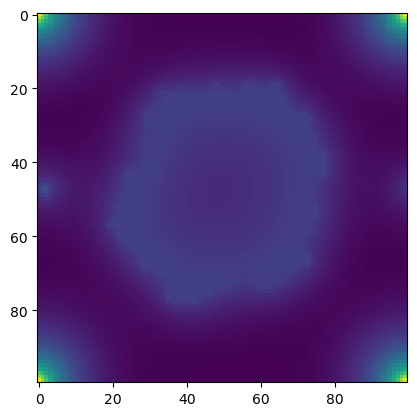

In [27]:
plt.imshow(tissue4.immuneSystem.cytokineConcentration)

### 5.- All cases comparison

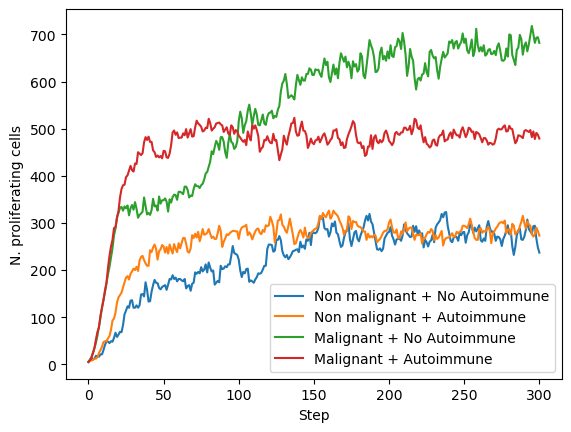

In [28]:
data1 = tissue1.cellCountSeries[:,0]
data2 = tissue2.cellCountSeries[:,0]
data3 = tissue3.cellCountSeries[:,0]
data4 = tissue4.cellCountSeries[:,0]

plt.figure()

plt.plot(data1, label = 'Non malignant + No Autoimmune')
plt.plot(data2, label ='Non malignant + Autoimmune')
plt.plot(data3, label = 'Malignant + No Autoimmune')
plt.plot(data4, label = 'Malignant + Autoimmune')
plt.xlabel("Step")
plt.ylabel("N. proliferating cells")
plt.legend()

In [ ]:
import csv

def exportCSVTable(data, headers, path):
    f = open(path, 'w')
    writer = csv.writer(f, delimiter = ',')
    writer.writerow(headers)
    for i in range(0,np.size(data,0)):
        writer.writerow(data[i,:])
    f.close()
        
    
    